## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code

In [1]:
from bia_bob import bob
bob.__version__

'0.12.0'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

I will load an image file named `blobs.tif` and display it.



StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
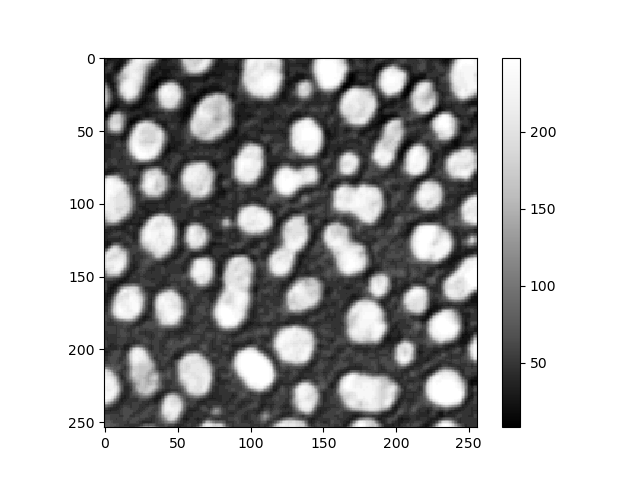
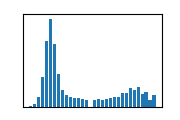

In [3]:
from skimage.io import imread
import stackview

# Load the image
image = imread("blobs.tif")

# Display the image
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

I will load a grayscale image from disk, segment it to identify nuclei-like objects using Otsu's thresholding followed by connected components labeling. Finally, I will measure the area of each segmented label and overlay these areas on the segmented image for visual inspection.



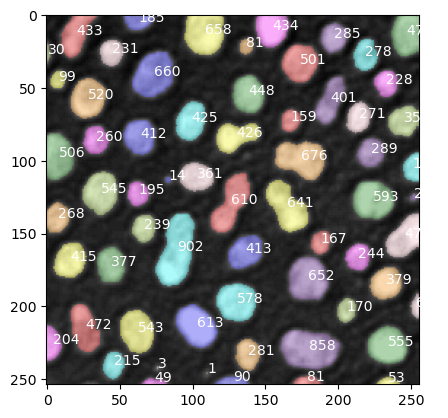

In [5]:
from skimage.io import imread
import stackview
from skimage import filters, measure, color
from skimage.measure import regionprops
from skimage.morphology import label
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = imread("blobs.tif")

# Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Perform connected components labeling
label_image = label(binary_image)

# Measure the area for each region
properties = regionprops(label_image)

# Create an output image to overlay areas
overlay_image = color.label2rgb(label_image, image, bg_label=0, kind='overlay')

# Annotate areas on the overlay image
fig, ax = plt.subplots()
ax.imshow(overlay_image)
for region in properties:
    # Get the coordinates of the region's centroid
    y0, x0 = region.centroid
    ax.text(x0, y0, str(region.area), color='white')

# Display the annotated image
plt.show()

In [6]:
%%bob
Take the segmented label image and expand the labels by 4 pixels. Show the resulting label image alone.

I will take the previously segmented label image and expand the labels by 4 pixels using the `expand_labels` function from `skimage.segmentation`. Then, I will display the resulting expanded label image.



StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
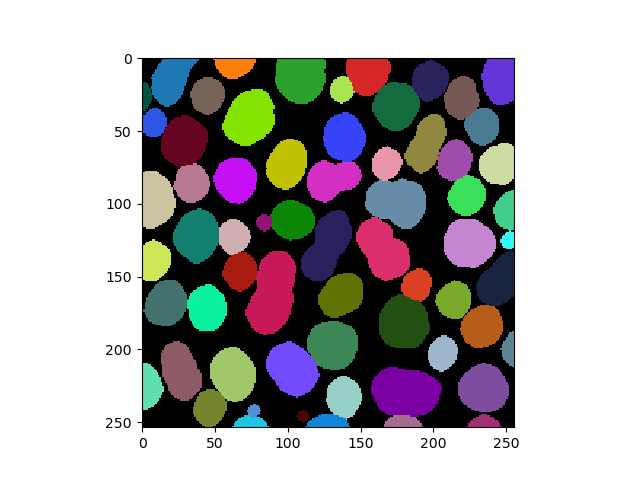

In [7]:
from skimage.segmentation import expand_labels
import stackview

# Expand the labels by 4 pixels
expanded_labels = expand_labels(label_image, distance=4)

# Display the expanded label image
stackview.insight(expanded_labels)